# DR Analysis

## Problem Statements
1. Find the distribution of feedback and plot pie chart.
2. Find top 5 subjects with respect to the doubts asked.
3. Find the percentage distribution of similarity score for relevant feedbacks for each subject.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

## Data

In [4]:
df = pd.read_csv("C:/Users/tushar.mane_embibe/Downloads/DR.csv")
df.head()

,user_goal,user_exam,question_goal,question_exam,question_subject,question_unit,image_url,q1,q1 feedback,q1_sim,q2,q2 feedback,q2_sim
0,cbse,10th cbse,ssc,ib security assistant or executive tier 1,quantitative aptitude,geometry,https://cdn.yellowmessenger.com/e2d57a4f24085c...,4748732,Similar,0.905230,7746905,Similar,0.900655
1,rajasthan board,12th rbse,ib,pyp:2,mathematics,arithmetic,NaN,9125298,Irrelevant Query,0.892484,2518410,Irrelevant Query,0.867184
2,cbse,12th cbse,cbse,10th cbse,science,biology,NaN,2562651,Multiple Questions,0.729881,8637981,Multiple Questions,0.722225
3,engineering,jee advanced,medical,neet,physics,mechanics,https://cdn.yellowmessenger.com/015fe424528d2d...,5148591,Similar,0.932303,1777125,Similar,0.904473
4,medical,neet,bihar state board,11th bihar board,physics,mechanics,https://cdn.yellowmessenger.com/2969575f09cbc4...,1451999,Exact,0.932829,1557374,Exact,0.932829


**Drop unnecessary columns**

In [5]:
drop_list = ['user_goal', 'user_exam', 'question_goal', 'question_exam','question_unit', 'image_url', 'q1', 'q2']
df.drop(columns = drop_list, inplace = True)
df.head()

,question_subject,q1 feedback,q1_sim,q2 feedback,q2_sim
0,quantitative aptitude,Similar,0.905230,Similar,0.900655
1,mathematics,Irrelevant Query,0.892484,Irrelevant Query,0.867184
2,science,Multiple Questions,0.729881,Multiple Questions,0.722225
3,physics,Similar,0.932303,Similar,0.904473
4,physics,Exact,0.932829,Exact,0.932829


**Calculate the distribution in column q1 feedback.**

Text(0.5, 1.0, 'Distribution of feedback for q1')

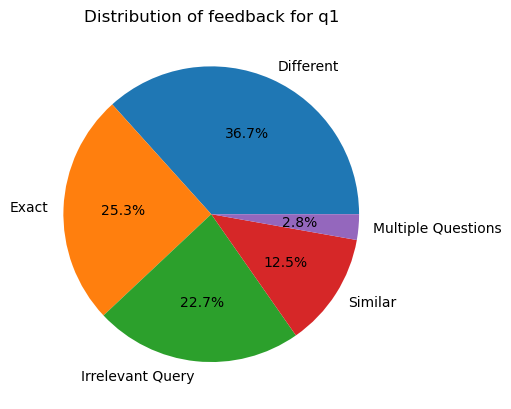

In [6]:
q1_counts = df['q1 feedback'].value_counts()

plt.pie(q1_counts, labels=q1_counts.index, autopct='%1.1f%%')
plt.title('Distribution of feedback for q1')

**Keep only relevant data in the DataFrame**

In [7]:
relevant_list = ['Exact', 'Similar', 'Different']
df = df.loc[df['q1 feedback'].isin(relevant_list)]

**Find top 5 subjects**

In [8]:
top_5 = df.groupby('question_subject').size().reset_index(name = 'doubt_num').sort_values('doubt_num', ascending = False).head(5)

In [9]:
rank = 1
for index, row in top_5.iterrows():
    sub = row['question_subject']
    num = row['doubt_num']
    print(f"Subject with most doubts at number {rank} is {sub} with number of doubts {num}.")
    rank += 1

Subject with most doubts at number 1 is physics with number of doubts 122.
Subject with most doubts at number 2 is mathematics with number of doubts 117.
Subject with most doubts at number 3 is science with number of doubts 83.
Subject with most doubts at number 4 is chemistry with number of doubts 38.
Subject with most doubts at number 5 is biology with number of doubts 20.


**Find the percentage distribution of similarity score for relevant feedbacks for each subject.**

In [10]:
top5_list = top_5['question_subject'].to_list()
df_top5 = df.loc[df['question_subject'].isin(top5_list)]
top5_grouped = df_top5.groupby(['question_subject', 'q1 feedback']).size().reset_index(name = 'count')

In [11]:
top5_grouped

,question_subject,q1 feedback,count
0,biology,Different,11
1,biology,Exact,6
2,biology,Similar,3
3,chemistry,Different,28
4,chemistry,Exact,6
5,chemistry,Similar,4
6,mathematics,Different,61
7,mathematics,Exact,33
8,mathematics,Similar,23
9,physics,Different,44


To create bar charts we need to create a pivot table.

In [12]:
pivot = top5_grouped.pivot(index='question_subject', columns='q1 feedback', values='count')
pivot = pivot.reindex(['Different', 'Similar', 'Exact'], axis=1)

print(pivot)

q1 feedback       Different  Similar  Exact
question_subject                           
biology                  11        3      6
chemistry                28        4      6
mathematics              61       23     33
physics                  44       17     61
science                  30       15     38


Text(0, 0.5, 'Count')

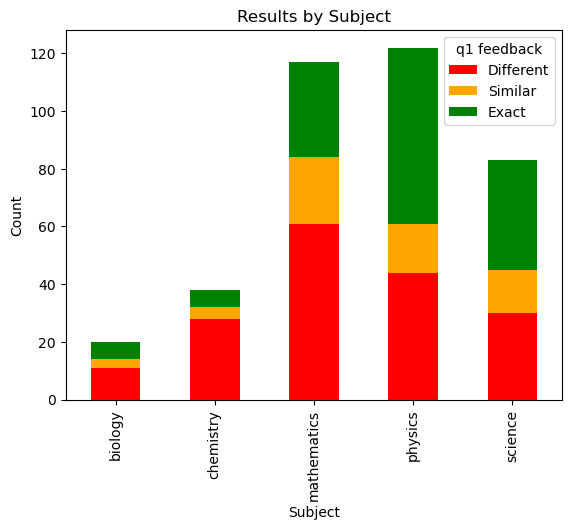

In [98]:
import matplotlib.pyplot as plt
colors = ['red', 'orange', 'green']
fig = pivot.plot.bar(stacked = True, color = colors)

# set the chart title and axis labels
plt.title('Results by Subject')
plt.xlabel('Subject')
plt.ylabel('Count')

In [100]:
top_5.head()

,question_subject,doubt_num
18,physics,122
14,mathematics,117
25,science,83
4,chemistry,38
2,biology,20


In [13]:
df = df.loc[df['question_subject'].isin(top5_list)]
# create bins for the values of q1_sim
bins = [0, 0.8, 0.9, 1]

# create labels for the categories
labels = ['Low', 'Mid', 'High']

# create the new column 'q1_sim_category' based on the bins and labels
df['q1_sim_category'] = pd.cut(df['q1_sim'], bins=bins, labels=labels, include_lowest=True)
df.head()

,question_subject,q1 feedback,q1_sim,q2 feedback,q2_sim,q1_sim_category
3,physics,Similar,0.932303,Similar,0.904473,High
4,physics,Exact,0.932829,Exact,0.932829,High
5,physics,Exact,0.956465,Exact,0.950396,High
6,physics,Similar,0.914326,Different,0.801643,High
8,science,Different,0.899915,Different,0.884123,Mid


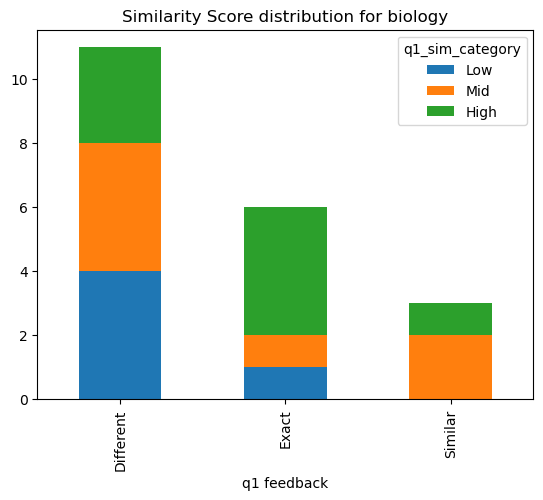

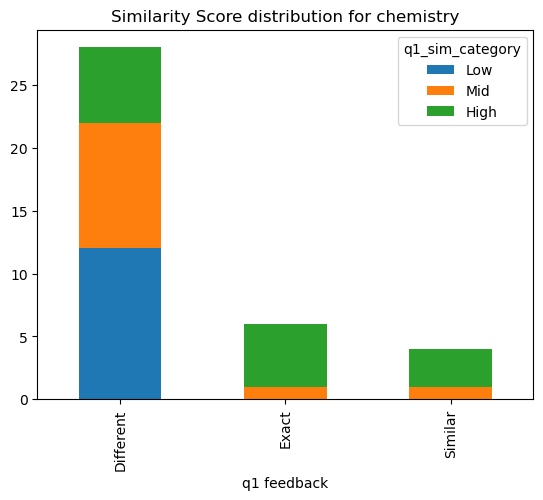

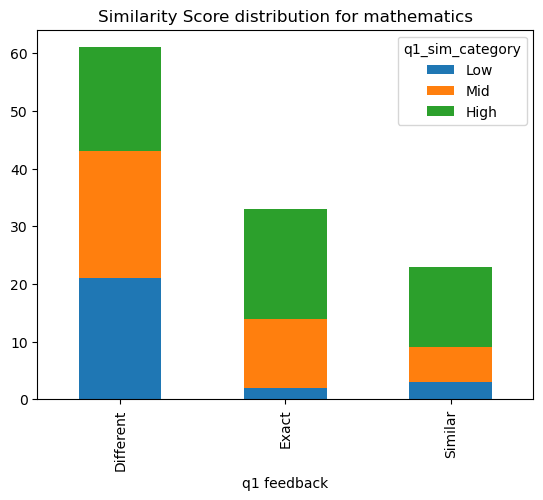

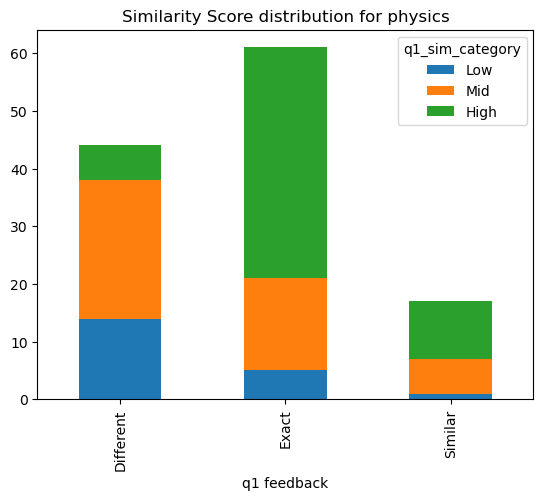

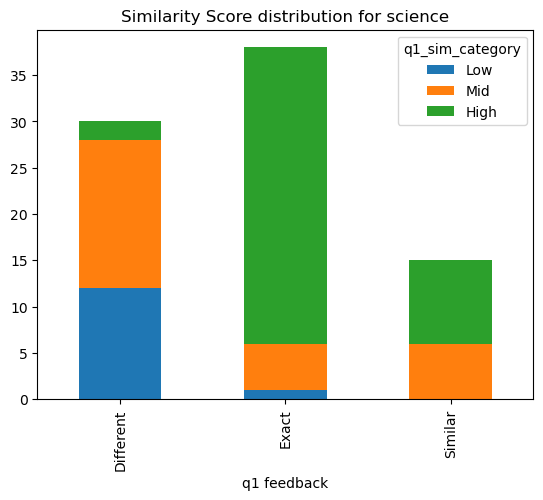

In [16]:
grouped_data = df.groupby(['question_subject', 'q1 feedback', 'q1_sim_category']).size().reset_index(name = 'count')
for subj in grouped_data['question_subject'].unique():
    subdf = grouped_data[grouped_data['question_subject'] == subj]
    subpivot = subdf.pivot(index='q1 feedback', columns='q1_sim_category', values='count')

    fig = subpivot.plot.bar(stacked = True)
    plt.title(f"Similarity Score distribution for {subj}")

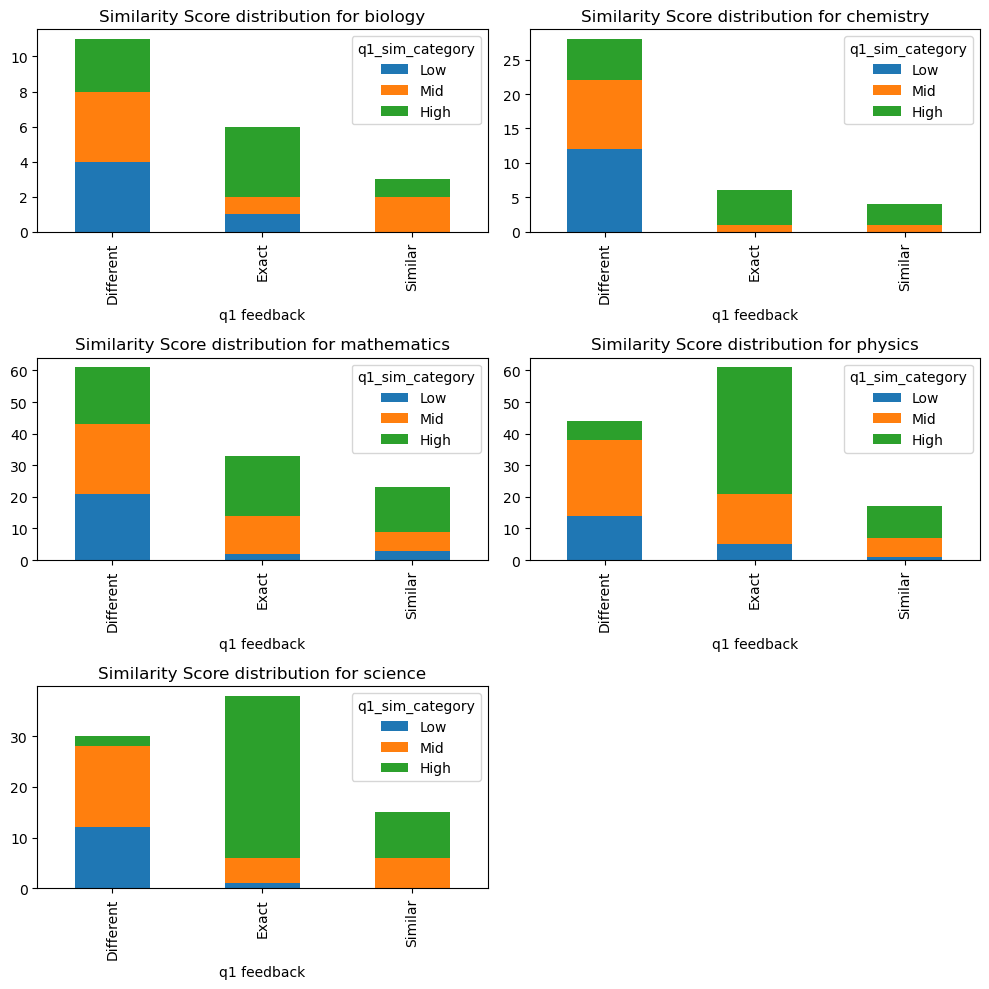

In [18]:
import matplotlib.pyplot as plt

# create a figure with 3 rows and 2 columns of subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 10))

# loop through each unique subject in grouped_data
for i, subj in enumerate(grouped_data['question_subject'].unique()):
    # get the data for this subject
    subdf = grouped_data[grouped_data['question_subject'] == subj]
    subpivot = subdf.pivot(index='q1 feedback', columns='q1_sim_category', values='count')
    
    # plot the data on the i-th subplot
    ax = axes[i//2][i%2]
    subpivot.plot(kind='bar', stacked=True, ax=ax)
    ax.set_title(f"Similarity Score distribution for {subj}")
    
    # add a blank subplot if we have plotted all subplots
    if i == len(grouped_data['question_subject'].unique()) - 1 and i % 2 == 0:
        fig.delaxes(axes[2][1])

plt.tight_layout()
plt.show()


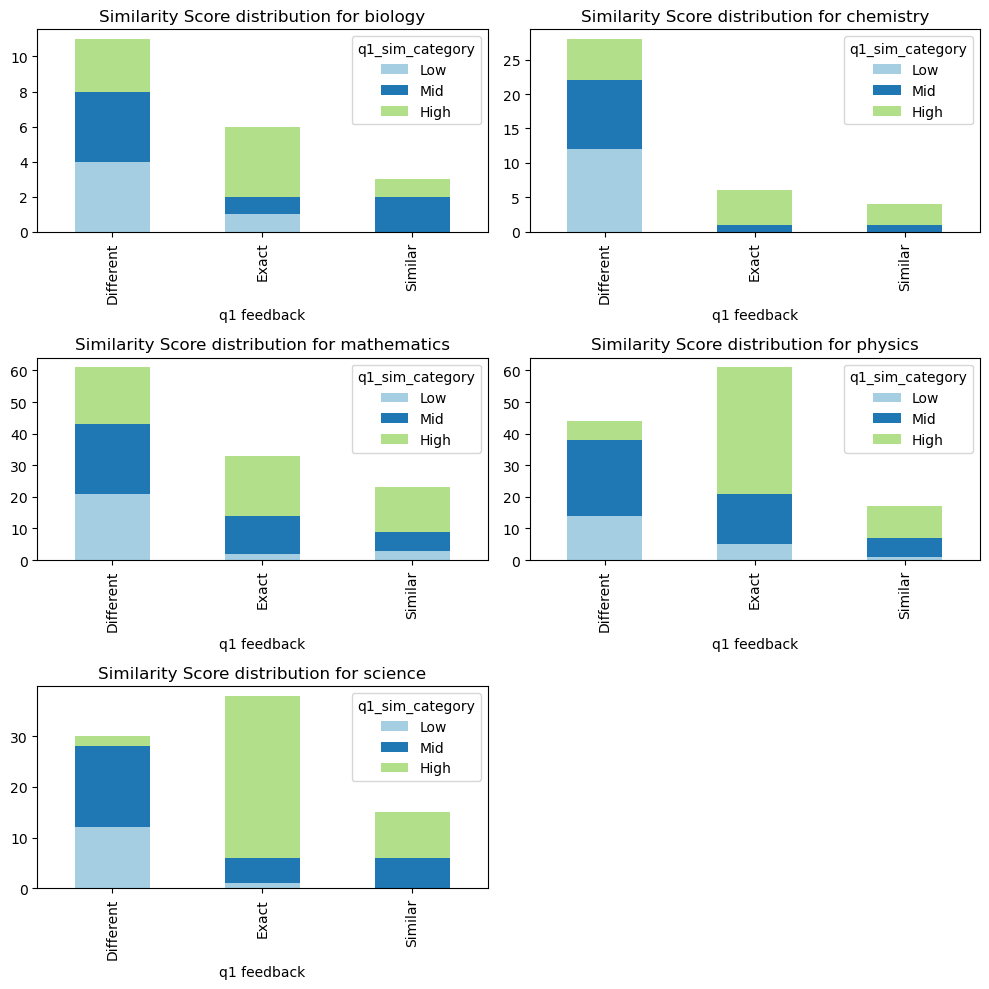

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# set the color palette
colors = sns.color_palette('Paired', n_colors=6)

# create a figure with 3 rows and 2 columns of subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 10))

# loop through each unique subject in grouped_data
for i, subj in enumerate(grouped_data['question_subject'].unique()):
    # get the data for this subject
    subdf = grouped_data[grouped_data['question_subject'] == subj]
    subpivot = subdf.pivot(index='q1 feedback', columns='q1_sim_category', values='count')
    
    # plot the data on the i-th subplot
    ax = axes[i//2][i%2]
    subpivot.plot(kind='bar', stacked=True, ax=ax, color=colors)
    ax.set_title(f"Similarity Score distribution for {subj}")
    
    # add a blank subplot if we have plotted all subplots
    if i == len(grouped_data['question_subject'].unique()) - 1 and i % 2 == 0:
        fig.delaxes(axes[2][1])

plt.tight_layout()
plt.show()
